# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
population   =pd.read_csv('/content/drive/MyDrive/Hackathons/Machine Hack/Predict accident risk score for unique postcode/Data/population.csv')
roads_network=pd.read_csv('/content/drive/MyDrive/Hackathons/Machine Hack/Predict accident risk score for unique postcode/Data/roads_network.csv')
train        =pd.read_csv('/content/drive/MyDrive/Hackathons/Machine Hack/Predict accident risk score for unique postcode/Data/train.csv')
test         =pd.read_csv('/content/drive/MyDrive/Hackathons/Machine Hack/Predict accident risk score for unique postcode/Data/test.csv')

In [3]:
population.head()

,postcode,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,AL1 1,Total,5453,2715,2738,5408,45,75,225.63,24.2
1,AL1 2,Total,6523,3183,3340,6418,105,77,286.59,22.8
2,AL1 3,Total,4179,2121,2058,4100,79,46,97.12,43.0
3,AL1 4,Total,9799,4845,4954,9765,34,285,244.75,40.0
4,AL1 5,Total,10226,5129,5097,10211,15,133,200.93,50.9


In [4]:
print(list(population.columns))

['postcode', 'Rural Urban', 'Variable: All usual residents; measures: Value', 'Variable: Males; measures: Value', 'Variable: Females; measures: Value', 'Variable: Lives in a household; measures: Value', 'Variable: Lives in a communal establishment; measures: Value', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value', 'Variable: Area (Hectares); measures: Value', 'Variable: Density (number of persons per hectare); measures: Value']


In [5]:
population['male_percent']     =population['Variable: Males; measures: Value']/population['Variable: All usual residents; measures: Value']
population['male_female']      =population['Variable: Males; measures: Value']/population['Variable: Females; measures: Value']
population['household_percent']=population['Variable: Lives in a household; measures: Value']/population['Variable: All usual residents; measures: Value']
population['household_vs_non'] =population['Variable: Lives in a household; measures: Value']/population['Variable: Lives in a communal establishment; measures: Value']
population['non_term']         =population['Variable: All usual residents; measures: Value']/population['Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value']
population=population.drop(['Rural Urban','Variable: All usual residents; measures: Value', 'Variable: Males; measures: Value', 'Variable: Females; measures: Value', 'Variable: Lives in a household; measures: Value', 'Variable: Lives in a communal establishment; measures: Value', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value', 'Variable: Area (Hectares); measures: Value', 'Variable: Density (number of persons per hectare); measures: Value'],axis=1)

In [6]:
population.head()

,postcode,male_percent,male_female,household_percent,household_vs_non,non_term
0,AL1 1,0.497891,0.991600,0.991748,120.177778,72.706667
1,AL1 2,0.487966,0.952994,0.983903,61.123810,84.714286
2,AL1 3,0.507538,1.030612,0.981096,51.898734,90.847826
3,AL1 4,0.494438,0.977998,0.996530,287.205882,34.382456
4,AL1 5,0.501565,1.006278,0.998533,680.733333,76.887218


In [7]:
roads_network.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,POINT (-2.3501 56.603923),A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,POINT (-2.021334 57.130142),A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,POINT (-2.108598 57.146338),A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,POINT (-2.093928 57.148218),A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,POINT (-2.116089 57.131671),A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [8]:
roads_network.isna().sum()/roads_network.shape[0]

WKT                                    0.000000
roadClassi                             0.013258
roadFuncti                             0.013258
formOfWay                              0.013258
length                                 0.013258
primaryRou                             0.013258
distance to the nearest point on rd    0.012636
postcode                               0.000000
dtype: float64

In [9]:
def lat(k):
  return(float(k[7:-1].split()[0]))

def lon(k):
  return(float(k[7:-1].split()[1]))
roads_network['lat']=roads_network['WKT'].apply(lat)
roads_network['lon']=roads_network['WKT'].apply(lon)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


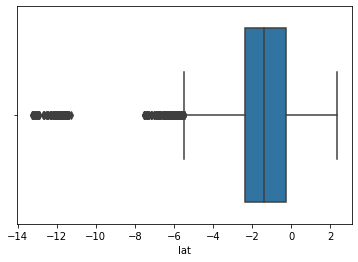

In [10]:
sns.boxplot(roads_network['lat'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


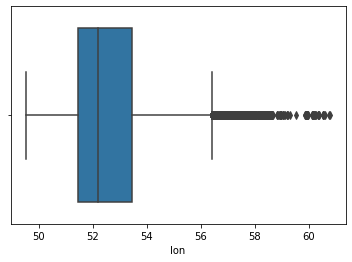

In [11]:
sns.boxplot(roads_network['lon'])

In [12]:
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


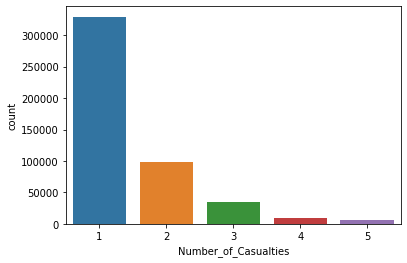

In [13]:
sns.countplot(train['Number_of_Casualties'])

In [14]:
# split weather based on first word
# average number of police in state - today
# average number of casualities in that state

In [15]:
train.columns

Index(['Accident_ID', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'country'],
      dtype='object')

'Day_of_Week'

In [16]:
week = train[['Day_of_Week','Police_Force']].groupby('Day_of_Week').agg('mean').reset_index().add_prefix('dw_')
train= train.merge(week,left_on='Day_of_Week',right_on='dw_Day_of_Week')
train['dw_Police_Force']=train['Police_Force']-train['dw_Police_Force']
train= train.drop('dw_Day_of_Week',axis=1)

test= test.merge(week,left_on='Day_of_Week',right_on='dw_Day_of_Week')
test['dw_Police_Force']=test['Police_Force']-test['dw_Police_Force']
test= test.drop('dw_Day_of_Week',axis=1)

week=train[['Day_of_Week','Number_of_Casualties']].groupby('Day_of_Week').agg('mean').reset_index().add_prefix('dw_')
train=train.merge(week,left_on='Day_of_Week',right_on='dw_Day_of_Week')
test=test.merge(week,left_on='Day_of_Week',right_on='dw_Day_of_Week')
train= train.drop('dw_Day_of_Week',axis=1)
test= test.drop('dw_Day_of_Week',axis=1)

week = train[['Day_of_Week','Number_of_Vehicles']].groupby('Day_of_Week').agg('mean').reset_index().add_prefix('dw_')
train= train.merge(week,left_on='Day_of_Week',right_on='dw_Day_of_Week')
train['dw_Number_of_Vehicles']=train['Number_of_Vehicles']-train['dw_Number_of_Vehicles']
train= train.drop('dw_Day_of_Week',axis=1)

test= test.merge(week,left_on='Day_of_Week',right_on='dw_Day_of_Week')
test['dw_Number_of_Vehicles']=test['Number_of_Vehicles']-test['dw_Number_of_Vehicles']
test= test.drop('dw_Day_of_Week',axis=1)

In [17]:
train.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,dw_Police_Force,dw_Number_of_Casualties,dw_Number_of_Vehicles
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,4.891263,1.457864,0.309352
1,13,15,2,1,08/01/12,7,8:00,305,E10000029,5,...,None,None,1,Yes,England,IG2 6NW,United Kingdom,-14.108737,1.457864,0.309352


'Time'

In [18]:
def time(k):
  if str(k)!='nan':
    k=str(k)
    L=k.split(':')
    return(int(int(L[0])*60+int(L[1])))
  return(k)

train['Time']=train['Time'].apply(time)
test['Time']=test['Time'].apply(time)

'Local_Authority_(District)'

In [19]:
district=train[['Local_Authority_(District)','Police_Force']].groupby('Local_Authority_(District)').agg('mean').reset_index().add_prefix('d_')
train=train.merge(district,left_on='Local_Authority_(District)',right_on='d_Local_Authority_(District)')
test=test.merge(district,left_on='Local_Authority_(District)',right_on='d_Local_Authority_(District)')

train['d_Police_Force']=train['Police_Force']-train['d_Police_Force']
test['d_Police_Force']=test['Police_Force']-test['d_Police_Force']

train= train.drop(['d_Local_Authority_(District)'],axis=1)
test= test.drop(['d_Local_Authority_(District)'],axis=1)


district=train[['Local_Authority_(District)','Number_of_Vehicles']].groupby('Local_Authority_(District)').agg('mean').reset_index().add_prefix('d_')
train=train.merge(district,left_on='Local_Authority_(District)',right_on='d_Local_Authority_(District)')
test=test.merge(district,left_on='Local_Authority_(District)',right_on='d_Local_Authority_(District)')

train['d_Number_of_Vehicles']=train['Number_of_Vehicles']-train['d_Number_of_Vehicles']
test['d_Number_of_Vehicles']=test['Number_of_Vehicles']-test['d_Number_of_Vehicles']

train= train.drop(['d_Local_Authority_(District)'],axis=1)
test= test.drop(['d_Local_Authority_(District)'],axis=1)


district=train[['Local_Authority_(District)','Number_of_Casualties']].groupby('Local_Authority_(District)').agg('mean').reset_index().add_prefix('d_')
train=train.merge(district,left_on='Local_Authority_(District)',right_on='d_Local_Authority_(District)')
test=test.merge(district,left_on='Local_Authority_(District)',right_on='d_Local_Authority_(District)')

# train['d_Number_of_Casualties']=train['Number_of_Casualties']-train['d_Number_of_Casualties']
# test['d_Number_of_Casualties']=test['Number_of_Casualties']-test['d_Number_of_Casualties']

train= train.drop(['d_Local_Authority_(District)','Local_Authority_(District)'],axis=1)
test= test.drop(['d_Local_Authority_(District)','Local_Authority_(District)'],axis=1)

'Local_Authority_(Highway)'

In [20]:
highway=train[['Local_Authority_(Highway)','Police_Force']].groupby('Local_Authority_(Highway)').agg('mean').reset_index().add_prefix('h_')
train=train.merge(highway,left_on='Local_Authority_(Highway)',right_on='h_Local_Authority_(Highway)')
test=test.merge(highway,left_on='Local_Authority_(Highway)',right_on='h_Local_Authority_(Highway)')

train['h_Police_Force']=train['Police_Force']-train['h_Police_Force']
test['h_Police_Force']=test['Police_Force']-test['h_Police_Force']

train= train.drop(['h_Local_Authority_(Highway)'],axis=1)
test= test.drop(['h_Local_Authority_(Highway)'],axis=1)


highway=train[['Local_Authority_(Highway)','Number_of_Vehicles']].groupby('Local_Authority_(Highway)').agg('mean').reset_index().add_prefix('h_')
train=train.merge(highway,left_on='Local_Authority_(Highway)',right_on='h_Local_Authority_(Highway)')
test=test.merge(highway,left_on='Local_Authority_(Highway)',right_on='h_Local_Authority_(Highway)')

train['h_Number_of_Vehicles']=train['Number_of_Vehicles']-train['h_Number_of_Vehicles']
test['h_Number_of_Vehicles']=test['Number_of_Vehicles']-test['h_Number_of_Vehicles']

train= train.drop(['h_Local_Authority_(Highway)'],axis=1)
test= test.drop(['h_Local_Authority_(Highway)'],axis=1)

highway=train[['Local_Authority_(Highway)','Number_of_Casualties']].groupby('Local_Authority_(Highway)').agg('mean').reset_index().add_prefix('h_')
train=train.merge(highway,left_on='Local_Authority_(Highway)',right_on='h_Local_Authority_(Highway)')
test=test.merge(highway,left_on='Local_Authority_(Highway)',right_on='h_Local_Authority_(Highway)')

train= train.drop(['h_Local_Authority_(Highway)','Local_Authority_(Highway)'],axis=1)
test= test.drop(['h_Local_Authority_(Highway)','Local_Authority_(Highway)'],axis=1)

In [21]:
set(train['Pedestrian_Crossing-Human_Control'])

{'Control by other authorised person',
 'Control by school crossing patrol',
 'None within 50 metres'}

In [22]:
Pedestrian_Crossing_Human_Control=list(set(train['Pedestrian_Crossing-Human_Control']))
train['Pedestrian_Crossing_Human_Control_interpreted_danger']=0
test['Pedestrian_Crossing_Human_Control_interpreted_danger']=0
j=0
for i in Pedestrian_Crossing_Human_Control:
  if i == 'None within 50 metres':
    train.loc[train['Pedestrian_Crossing-Human_Control']==i,'Pedestrian_Crossing_Human_Control_interpreted_danger']=1
    train.loc[train['Pedestrian_Crossing-Human_Control']==i,'Pedestrian_Crossing-Human_Control']=j

    test.loc[test['Pedestrian_Crossing-Human_Control']==i,'Pedestrian_Crossing_Human_Control_interpreted_danger']=1
    test.loc[test['Pedestrian_Crossing-Human_Control']==i,'Pedestrian_Crossing-Human_Control']=j
  else:
    train.loc[train['Pedestrian_Crossing-Human_Control']==i,'Pedestrian_Crossing-Human_Control']=j

    test.loc[test['Pedestrian_Crossing-Human_Control']==i,'Pedestrian_Crossing-Human_Control']=j
  j+=1

In [23]:
set(train['Pedestrian_Crossing-Physical_Facilities'])

{'Central refuge',
 'Footbridge or subway',
 'No physical crossing within 50 meters',
 'Pedestrian phase at traffic signal junction',
 'Zebra crossing',
 'non-junction pedestrian crossing'}

In [24]:
Pedestrian_Crossing_Physical_Facilities=list(set(train['Pedestrian_Crossing-Physical_Facilities']))
train['Pedestrian_Crossing_Physical_Facilities_interpreted_danger']=0
test['Pedestrian_Crossing_Physical_Facilities_interpreted_danger']=0
j=0
for i in Pedestrian_Crossing_Physical_Facilities:
  if i == 'No physical crossing within 50 meters':
    train.loc[train['Pedestrian_Crossing-Physical_Facilities']==i,'Pedestrian_Crossing_Physical_Facilities_interpreted_danger']=1
    train.loc[train['Pedestrian_Crossing-Physical_Facilities']==i,'Pedestrian_Crossing-Physical_Facilities']=j

    test.loc[test['Pedestrian_Crossing-Physical_Facilities']==i,'Pedestrian_Crossing_Physical_Facilities_interpreted_danger']=1
    test.loc[test['Pedestrian_Crossing-Physical_Facilities']==i,'Pedestrian_Crossing-Physical_Facilities']=j
  else:
    train.loc[train['Pedestrian_Crossing-Physical_Facilities']==i,'Pedestrian_Crossing-Physical_Facilities']=j

    test.loc[test['Pedestrian_Crossing-Physical_Facilities']==i,'Pedestrian_Crossing-Physical_Facilities']=j
  j+=1

In [25]:
set(train['Light_Conditions'])

{'Darkeness: No street lighting',
 'Darkness: Street lighting unknown',
 'Darkness: Street lights present and lit',
 'Darkness: Street lights present but unlit',
 'Daylight: Street light present'}

In [26]:
Light_Conditions=list(set(train['Light_Conditions']))
train['Light_Conditions_interpreted_danger']=0
train['Darkness']=1

test['Light_Conditions_interpreted_danger']=0
test['Darkness']=1
j=0
for i in Light_Conditions:
  if i == 'Darkeness: No street lighting' or i=='Darkness: Street lights present but unlit':
    train.loc[train['Light_Conditions']==i,'Light_Conditions_interpreted_danger']=1
    train.loc[train['Light_Conditions']==i,'Light_Conditions']=j

    test.loc[test['Light_Conditions']==i,'Light_Conditions_interpreted_danger']=1
    test.loc[test['Light_Conditions']==i,'Light_Conditions']=j
  else:
    if i=='Daylight: Street light present':
      train.loc[train['Light_Conditions']==i,'Darkness']=1

      test.loc[test['Light_Conditions']==i,'Darkness']=1

  
    train.loc[train['Light_Conditions']==i,'Light_Conditions']=j

    test.loc[test['Light_Conditions']==i,'Light_Conditions']=j
  j+=1

In [27]:
set(train['Weather_Conditions'])

{'Fine with high winds',
 'Fine without high winds',
 'Fog or mist',
 'Other',
 'Raining with high winds',
 'Raining without high winds',
 'Snowing with high winds',
 'Snowing without high winds',
 'Unknown'}

In [28]:
def w(k):
  return(k.split()[0])
train['weather']=train['Weather_Conditions'].apply(w)
test['weather']=test['Weather_Conditions'].apply(w)

In [29]:
Weather_Conditions=list(set(train['Weather_Conditions']))
train['Weather_Conditions_high_winds']=0

test['Weather_Conditions_high_winds']=0

j=0
for i in Weather_Conditions:
  if i == 'Fine with high winds' or i=='Raining with high winds' or i=='Snowing with high winds':
    train.loc[train['Weather_Conditions']==i,'Weather_Conditions_high_winds']=1
    train.loc[train['Weather_Conditions']==i,'Weather_Conditions']=j

    test.loc[test['Weather_Conditions']==i,'Weather_Conditions_high_winds']=1
    test.loc[test['Weather_Conditions']==i,'Weather_Conditions']=j
  else:
    train.loc[train['Weather_Conditions']==i,'Weather_Conditions']=j

    test.loc[test['Weather_Conditions']==i,'Weather_Conditions']=j
  j+=1

In [30]:
set(train['Road_Surface_Conditions'])

{'Dry', 'Flood (Over 3cm of water)', 'Frost/Ice', 'Snow', 'Wet/Damp', nan}

In [31]:
Road_Surface_Conditions=list(set(train['Road_Surface_Conditions']))

j=0
for i in Road_Surface_Conditions:
  if j!=1 and i!='Wet/Damp':
    train.loc[train['Road_Surface_Conditions']==i,'Road_Surface_Conditions']=j

    test.loc[test['Road_Surface_Conditions']==i,'Road_Surface_Conditions']=j
  elif j==1 and i!='Wet/Damp':
    j+=1
    train.loc[train['Road_Surface_Conditions']==i,'Road_Surface_Conditions']=j

    test.loc[test['Road_Surface_Conditions']==i,'Road_Surface_Conditions']=j
  else:
    train.loc[train['Road_Surface_Conditions']==i,'Road_Surface_Conditions']=1

    test.loc[test['Road_Surface_Conditions']==i,'Road_Surface_Conditions']=1
  j+=1

In [32]:
set(train['Special_Conditions_at_Site'])

{'Auto traffic signal partly defective',
 'Auto traffic singal out',
 'Mud',
 'None',
 'Ol or diesel',
 'Permanent sign or marking defective or obscured',
 'Road surface defective',
 'Roadworks',
 nan}

In [33]:
train['Condition']=1
train.loc[train['Special_Conditions_at_Site']=='None','Condition']=0

test['Condition']=1
test.loc[test['Special_Conditions_at_Site']=='None','Condition']=0

In [34]:
Special_Conditions_at_Site=list(set(train['Special_Conditions_at_Site']))

j=0
for i in Special_Conditions_at_Site:
  train.loc[train['Special_Conditions_at_Site']==i,'Special_Conditions_at_Site']=j

  test.loc[test['Special_Conditions_at_Site']==i,'Special_Conditions_at_Site']=j
  j+=1

In [35]:
set(train['Carriageway_Hazards'])

{'Any animal (except a ridden horse)',
 'Dislodged vehicle load in carriageway',
 'Involvement with previous accident',
 'None',
 'Other object in carriageway',
 'Pedestrian in carriageway (not injured)'}

In [36]:
train['Hazards_Condition']=1
train.loc[train['Carriageway_Hazards']=='None','Hazards_Condition']=0

test['Hazards_Condition']=1
test.loc[test['Carriageway_Hazards']=='None','Hazards_Condition']=0

In [37]:
Carriageway_Hazards=list(set(train['Carriageway_Hazards']))

j=0
for i in Carriageway_Hazards:
  train.loc[train['Carriageway_Hazards']==i,'Carriageway_Hazards']=j

  test.loc[test['Carriageway_Hazards']==i,'Carriageway_Hazards']=j
  j+=1

In [38]:
l=['Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','state', 'country','Road_Type','weather']
for i in l:
  lis=list(set(train[i]))

  j=0  
  for k in lis:
    train.loc[train[i]==k,i]=j

    test.loc[test[i]==k,i]=j
    j+=1

In [39]:
state=train[['state','Police_Force']].groupby('state').agg('mean').reset_index().add_prefix('s_')
train=train.merge(state,left_on='state',right_on='s_state')
test=test.merge(state,left_on='state',right_on='s_state')

train['s_Police_Force']=train['Police_Force']-train['s_Police_Force']
test['s_Police_Force']=test['Police_Force']-test['s_Police_Force']

train= train.drop(['s_state'],axis=1)
test= test.drop(['s_state'],axis=1)

state=train[['state','Number_of_Vehicles']].groupby('state').agg('mean').reset_index().add_prefix('s_')
train=train.merge(state,left_on='state',right_on='s_state')
test=test.merge(state,left_on='state',right_on='s_state')

train['s_Number_of_Vehicles']=train['Number_of_Vehicles']-train['s_Number_of_Vehicles']
test['s_Number_of_Vehicles']=test['Number_of_Vehicles']-test['s_Number_of_Vehicles']

train= train.drop(['s_state'],axis=1)
test= test.drop(['s_state'],axis=1)


state=train[['state','Number_of_Casualties']].groupby('state').agg('mean').reset_index().add_prefix('s_')
train=train.merge(state,left_on='state',right_on='s_state')
test=test.merge(state,left_on='state',right_on='s_state')

train= train.drop(['s_state','state'],axis=1)
test= test.drop(['s_state','state'],axis=1)

In [40]:
country=train[['country','Police_Force']].groupby('country').agg('mean').reset_index().add_prefix('c_')
train=train.merge(country,left_on='country',right_on='c_country')
test=test.merge(country,left_on='country',right_on='c_country')

train['c_Police_Force']=train['Police_Force']-train['c_Police_Force']
test['c_Police_Force']=test['Police_Force']-test['c_Police_Force']

train= train.drop(['c_country'],axis=1)
test= test.drop(['c_country'],axis=1)

country=train[['country','Number_of_Vehicles']].groupby('country').agg('mean').reset_index().add_prefix('c_')
train=train.merge(country,left_on='country',right_on='c_country')
test=test.merge(country,left_on='country',right_on='c_country')

train['c_Police_Force']=train['Number_of_Vehicles']-train['c_Number_of_Vehicles']
test['c_Number_of_Vehicles']=test['Number_of_Vehicles']-test['c_Number_of_Vehicles']

train= train.drop(['c_country'],axis=1)
test= test.drop(['c_country'],axis=1)

country=train[['country','Number_of_Casualties']].groupby('country').agg('mean').reset_index().add_prefix('c_')
train=train.merge(country,left_on='country',right_on='c_country')
test=test.merge(country,left_on='country',right_on='c_country')


train= train.drop(['c_country','country'],axis=1)
test= test.drop(['c_country','country'],axis=1)

In [41]:
train

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,...,weather,Weather_Conditions_high_winds,Condition,Hazards_Condition,s_Police_Force,s_Number_of_Vehicles,s_Number_of_Casualties,c_Police_Force,c_Number_of_Vehicles,c_Number_of_Casualties
0,1,34,2,1,19/12/12,7,800.0,4,395,4,...,1,0,1,0,7.713941,0.248808,1.461549,0.254305,1.745695,1.463528
1,79857,22,1,3,04/02/12,7,785.0,5,1100,4,...,4,0,1,0,-4.286059,-0.751192,1.461549,-0.745695,1.745695,1.463528
2,86279,13,1,1,08/05/12,7,1010.0,6,7,4,...,1,0,0,0,-13.286059,-0.751192,1.461549,-0.745695,1.745695,1.463528
3,130432,33,1,1,27/07/12,7,495.0,5,424,4,...,1,0,0,0,6.713941,-0.751192,1.461549,-0.745695,1.745695,1.463528
4,135536,33,1,1,11/04/12,7,541.0,5,8452,4,...,1,1,0,0,6.713941,-0.751192,1.461549,-0.745695,1.745695,1.463528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478736,54581,63,2,1,16/03/12,2,1041.0,3,338,0,...,1,0,0,0,2.607522,0.213261,1.430799,0.254305,1.745695,1.463528
478737,331962,61,1,1,12/05/12,6,685.0,5,4201,0,...,1,0,1,0,0.607522,-0.786739,1.430799,-0.745695,1.745695,1.463528
478738,332387,50,2,2,04/04/12,3,900.0,6,11,2,...,1,0,0,0,-10.392478,0.213261,1.430799,0.254305,1.745695,1.463528
478739,71892,95,1,1,01/02/12,2,512.0,3,3,4,...,1,0,0,0,34.607522,-0.786739,1.430799,-0.745695,1.745695,1.463528


In [42]:
train.isna().sum()

Accident_ID                                                     0
Police_Force                                                    0
Number_of_Vehicles                                              0
Number_of_Casualties                                            0
Date                                                            0
Day_of_Week                                                     0
Time                                                           14
1st_Road_Class                                                  0
1st_Road_Number                                                 0
Road_Type                                                       0
Speed_limit                                                     0
2nd_Road_Class                                                  0
2nd_Road_Number                                                 0
Pedestrian_Crossing-Human_Control                               0
Pedestrian_Crossing-Physical_Facilities                         0
Light_Cond

In [43]:
train=train.fillna(-7)
test=test.fillna(-7)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478741 entries, 0 to 478740
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   Accident_ID                                                 478741 non-null  int64  
 1   Police_Force                                                478741 non-null  int64  
 2   Number_of_Vehicles                                          478741 non-null  int64  
 3   Number_of_Casualties                                        478741 non-null  int64  
 4   Date                                                        478741 non-null  object 
 5   Day_of_Week                                                 478741 non-null  int64  
 6   Time                                                        478741 non-null  float64
 7   1st_Road_Class                                              478741 non-nul

# Split Data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
train.shape

(478741, 46)

In [48]:
train_data=train[:int(478741*0.8)]
cv_data=train[int(478741*0.8):int(478741*0.9)]
test_data=train[int(478741*0.9):]

# Model

In [49]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm

In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostRegressor

  0%|          | 0/24 [00:00<?, ?it/s]

[04:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  4%|▍         | 1/24 [00:04<01:39,  4.33s/it]

1.159462267701104
1.144904948986091
1.127065965731337
3
[04:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  8%|▊         | 2/24 [00:09<01:44,  4.74s/it]

0.9883984910266432
0.9734755353228098
0.9547961062671755
5
[04:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 12%|█▎        | 3/24 [00:15<01:52,  5.36s/it]

0.8760641188068318
0.8611484462064413
0.8431268334573241
7
[04:07:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 17%|█▋        | 4/24 [00:22<02:01,  6.08s/it]

0.8022777491258469
0.7873220394523559
0.7699859420066348
9
[04:07:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 21%|██        | 5/24 [00:30<02:11,  6.90s/it]

0.7537500987002592
0.7382103706549307
0.7209687454411741
11
[04:07:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 25%|██▌       | 6/24 [00:40<02:20,  7.79s/it]

0.7217856352698837
0.7054274037116428
0.6880649541483583
13
[04:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 29%|██▉       | 7/24 [00:51<02:27,  8.68s/it]

0.7007183093078089
0.6844569397250222
0.668172380714099
15
[04:07:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 33%|███▎      | 8/24 [01:02<02:33,  9.61s/it]

0.6867645715298737
0.6702474852305462
0.6548120797833895
17
[04:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 38%|███▊      | 9/24 [01:15<02:39, 10.62s/it]

0.6775571196118698
0.6610947618163899
0.6466713788903642
19
[04:08:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 42%|████▏     | 10/24 [01:29<02:45, 11.80s/it]

0.6714578848029243
0.65507772816701
0.6415576671037622
21
[04:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 46%|████▌     | 11/24 [01:46<02:51, 13.21s/it]

0.6673840771791487
0.6510011049812124
0.6382043704705611
23
[04:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 50%|█████     | 12/24 [02:03<02:52, 14.35s/it]

0.6646799649218165
0.6481803406606798
0.6358217189683488
25
[04:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 54%|█████▍    | 13/24 [02:21<02:51, 15.55s/it]

0.6628390815590205
0.6464063703834207
0.634604402104505
27
[04:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 58%|█████▊    | 14/24 [02:41<02:47, 16.79s/it]

0.6615687916813568
0.6451259828305589
0.6338475724945625
29
[04:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 62%|██████▎   | 15/24 [03:02<02:42, 18.06s/it]

0.6607234598738635
0.6443108870353471
0.6335197316962954
31
[04:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 67%|██████▋   | 16/24 [03:24<02:34, 19.29s/it]

0.6601073039676081
0.6437042623067109
0.6333236248951639
33
[04:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 71%|███████   | 17/24 [03:47<02:22, 20.39s/it]

0.659680607528856
0.6432755013408119
0.6332845697354524
35
[04:10:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 75%|███████▌  | 18/24 [04:11<02:08, 21.38s/it]

0.6593581247476304
0.6429872704722004
0.633290404864052
37
[04:11:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 79%|███████▉  | 19/24 [04:35<01:51, 22.37s/it]

0.6591185226539421
0.6428235032890892
0.6333887713853477
39
[04:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 83%|████████▎ | 20/24 [05:00<01:32, 23.24s/it]

0.6589498143151926
0.6426910245812595
0.63346007553268
41
[04:12:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 88%|████████▊ | 21/24 [05:26<01:12, 24.04s/it]

0.6588019750466345
0.6425733389109274
0.6335759153141274
43
[04:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 92%|█████████▏| 22/24 [05:54<00:50, 25.06s/it]

0.658685761971686
0.6425175632128356
0.6335711854594843
45
[04:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 96%|█████████▌| 23/24 [06:22<00:25, 25.95s/it]

0.6585805414277258
0.6424856789443291
0.6335574015328211
47
[04:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 24/24 [06:51<00:00, 17.16s/it]

0.6584941219303333
0.6425054063128419
0.6337151714651131
49


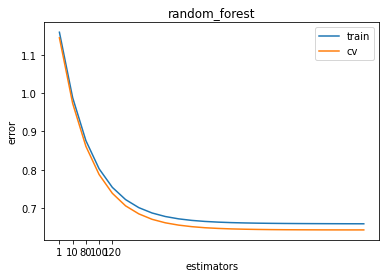

In [51]:
trained=[]
cved=[]
tested=[]
for i in tqdm(np.arange(3,50,2)):
  regr = XGBRegressor(n_estimators=i)
  regr.fit(train_data.drop(['Number_of_Casualties','postcode','Date'],axis=1),train_data['Number_of_Casualties'])
  y_train_pred=regr.predict(train_data.drop(['Number_of_Casualties','postcode','Date'],axis=1))
  trained.append(mean_squared_error(train_data['Number_of_Casualties'], y_train_pred))
  y_cv_pred=regr.predict(cv_data.drop(['Number_of_Casualties','postcode','Date'],axis=1))
  cved.append(mean_squared_error(cv_data['Number_of_Casualties'], y_cv_pred))
  y_test_pred=regr.predict(test_data.drop(['Number_of_Casualties','postcode','Date'],axis=1))
  tested.append(mean_squared_error(test_data['Number_of_Casualties'], y_test_pred))
  print(trained[-1])
  print(cved[-1])
  print(tested[-1])
  print(i)
plt.plot(trained,label='train')
plt.plot(cved,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4],[1,10,80,100,120])
plt.ylabel('error')
plt.title('random_forest')
plt.legend()
plt.show()

In [52]:
regr = XGBRegressor(n_estimators=35)
regr.fit(train.drop(['Number_of_Casualties','postcode','Date'],axis=1),train['Number_of_Casualties'])

[04:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=35)

In [53]:
from xgboost import plot_importance

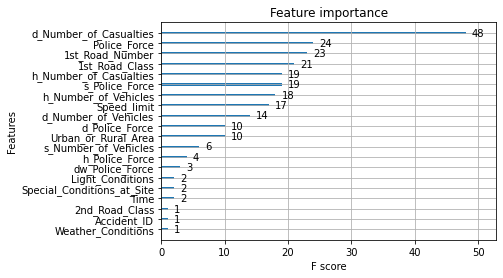

In [54]:
plot_importance(regr)
plt.show()

In [55]:
col=list(train.columns)

In [56]:
test['Accident_risk_index']=regr.predict(test[col].drop(['Number_of_Casualties','postcode','Date'],axis=1))

In [57]:
test[['postcode','Accident_risk_index']].groupby('postcode').agg('mean').reset_index().to_csv('xgb35_new.csv',index=False)

In [ ]:
len(list(set(train['Accident_ID'])))

In [ ]:
train.shape

In [ ]:
cb50=pd.read_csv('/content/cb50.csv')
gb41=pd.read_csv('/content/gb41.csv')
lgbm33=pd.read_csv('/content/lgbm33.csv')
xgb27=pd.read_csv('/content/xgb27.csv')

In [ ]:
cb50['Accident_risk_index'].apply('mean')

In [ ]:
xgb27['Accident_risk_index'].apply('mean')

In [ ]:
lgbm33['Accident_risk_index'].apply('mean')

In [ ]:
gb41['Accident_risk_index'].apply('mean')

In [ ]:
re=xgb27.add_prefix('xgb_').merge(gb41.add_prefix('gb_'),left_on='xgb_postcode',right_on='gb_postcode').merge(lgbm33.add_prefix('lgbm_'),left_on='xgb_postcode',right_on='lgbm_postcode')

In [ ]:
re[['xgb_Accident_risk_index','gb_Accident_risk_index','lgbm_Accident_risk_index']].min(axis=1).mean()